In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class plot_diagram():
    
    def __init__(self, X, Y, w,stop, go=False):
        start=w.data
        self.error=[]
        self.parameter=[]
        self.X=X.numpy()
        self.Y=Y.numpy()
        self.parameter_values=torch.arange(start, stop)
        self.Loss_function=[criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data=start
        
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
   
    def __del__(self):
        plt.close('all')

In [3]:
import torch

In [4]:
X= torch.arange(-3, 3, 0.1).view(-1,1)

In [5]:
f=-3*X

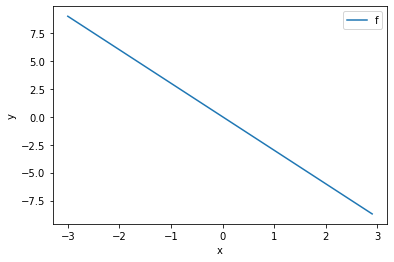

In [6]:
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
Y=f+0.1*torch.randn(X.size())

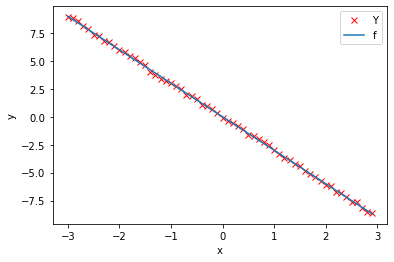

In [8]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
def forward(x):
    return w*x

In [10]:
def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [11]:
lr=0.1
LOSS=[]

In [12]:
w=torch.tensor(-10.0,requires_grad=True)

In [13]:
gradient_plot=plot_diagram(X, Y, w, stop=5)

In [15]:
def train_model(iter):
    for epoch in range(iter):
        Yhat=forward(X) #make the prediction as we learned in the last lab
        loss=criterion(Yhat,Y) #calculate the iteration
        gradient_plot(Yhat, w, loss.item(), epoch) #plot the diagram  for us to have a better idea
        LOSS.append(loss.item())
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        # updata parameters
        w.data = w.data - lr * w.grad.data
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        

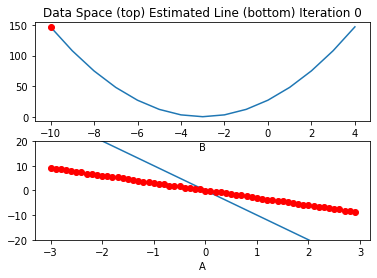

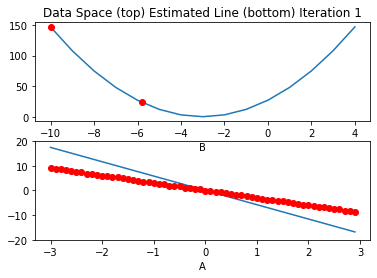

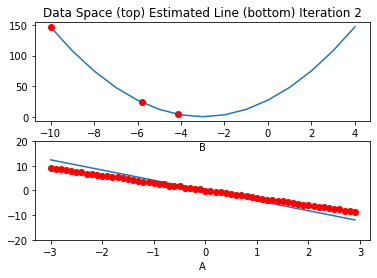

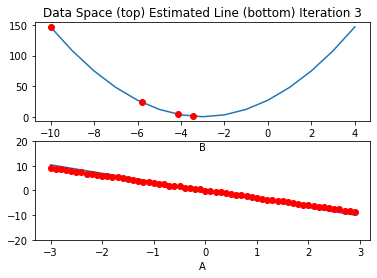

<Figure size 432x288 with 0 Axes>

In [17]:
train_model(4)

Text(23.875, 0.5, 'Cost')

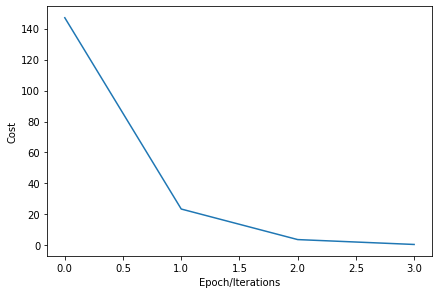

In [18]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [20]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [21]:
import torch

In [22]:
X=torch.arange(-3, 3,0.1).view(-1,1)

In [23]:
f=1*X-1

In [24]:
Y=f+0.1*torch.randn(X.size())

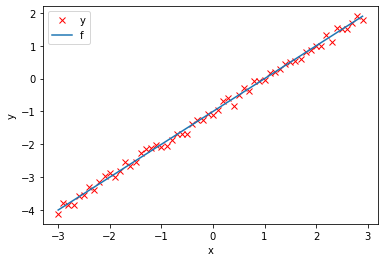

In [25]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [26]:
def forward(x):
    return w*x+b

In [27]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

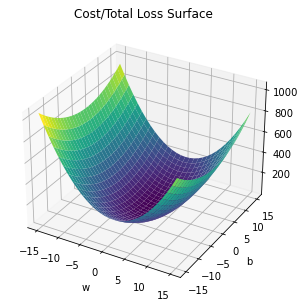

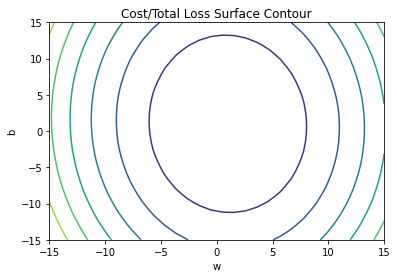

In [28]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [29]:
w=torch.tensor(-15.0, requires_grad=True)
b=torch.tensor(-10.0, requires_grad=True)

In [30]:
lr=0.1
LOSS=[]

In [31]:
def train_model(iter):
    
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()
        

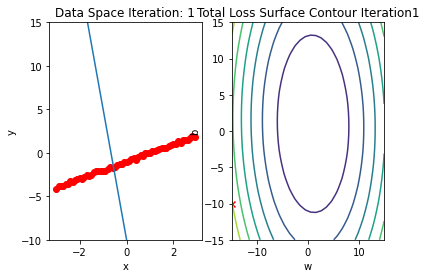

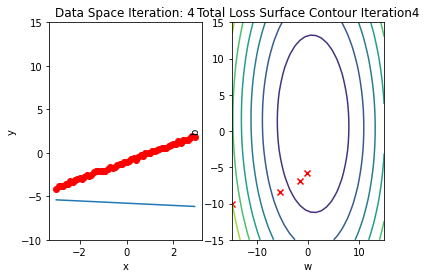

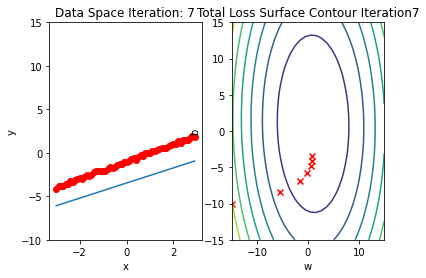

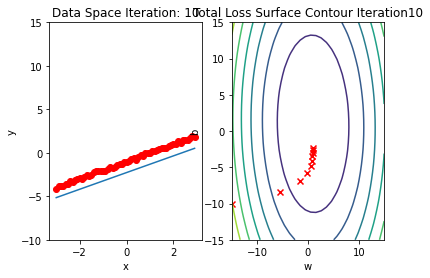

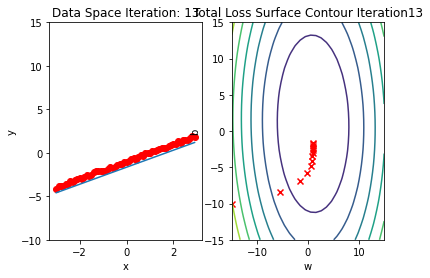

In [32]:
train_model(15)

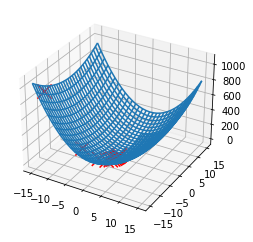

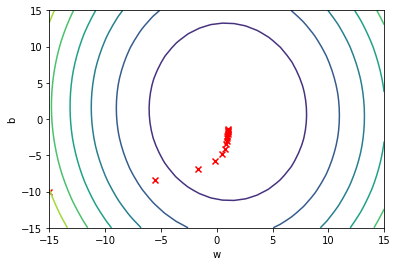

Text(23.875, 0.5, 'Cost')

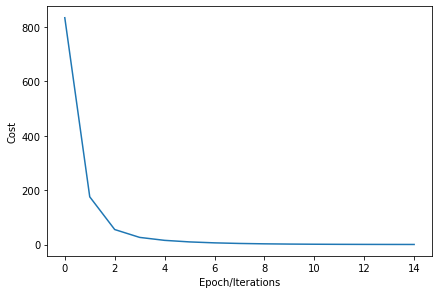

In [33]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [34]:

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []